In [1]:
%env QHL_NUMPY=jax

import time
from model import *
from data_loader import *
from layers_init import *
from jax.example_libraries.optimizers import adam, adamax

layer_sizes = [4, 10]

params = init_network_params(layer_sizes, random.PRNGKey(0))
step_size = 0.1
num_epochs = 8
num_it = 1
batch_size = 128
n_targets = 10
kernel_size = 8
kernel_numb = 1
num_quantum = 1
num_conv = 1
kernel = np.random.randn(kernel_numb, kernel_size, kernel_size)
kernel2 = np.random.randn(kernel_numb, int(kernel_size/2), int(kernel_size/2))

#my_conv = [my_conv_1, my_conv_2]
theta = jnp.asarray(90*np.random.random((num_quantum, 6)))
print(type(theta))
theta14 = jnp.asarray(90*np.random.random(24), dtype = int)
params.insert(0, theta)
params.insert(0, kernel2)
params.insert(0, kernel)
print(len(theta))

loss_history = []
loss_history_train = []
loss_history_test = []
train_accuracy = []
test_accuracy = []
step_size = 0
opt_init, opt_state, get_params = adam(1e-3, b1 = 0.9, b2 = 0.999)
opt_state = opt_init(params)

training_generator, train_images, train_labels, test_images, test_labels = data(batch_size, n_targets)
# print(f'{theta=}')
print(params[2])
for epoch in range(num_epochs):
    start_time = time.time()
    for x, y in training_generator:
        for it in range(num_it):
            yy = one_hot(y, n_targets)
            my_conv_1 = Conv(kernel_numb,kernel_size, params[0])
            my_conv_2 = Conv(kernel_numb,kernel_size/2, kernel = params[1])
            my_conv = [my_conv_1, my_conv_2]
            loss_res, opt_state = update(opt_state, x, yy, step_size, optimizer = adam(1e-3, b1 = 0.9, b2 = 0.999), theta = None, conv=my_conv)
            loss_history.append(float(loss_res))
           

    epoch_time = time.time() - start_time
    params = get_params(opt_state)
    #loss_train = loss(params, train_images, train_labels, theta = None, conv=my_conv)
    loss_test = loss(params, test_images, test_labels, theta = None, conv=my_conv)
    #loss_history_train.append(float(loss_train))
    loss_history_test.append(float(loss_test))
    train_acc = accuracy(params, train_images, train_labels, theta = None, conv=my_conv)
    test_acc = accuracy(params, test_images, test_labels, theta = None, conv=my_conv)
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)
    print("Epoch {} in {:0.2f} sec".format(epoch, epoch_time))
    print(f"Training set accuracy {format(train_acc)} loss {loss_history[-1]}")
    print("Test set accuracy {}".format(test_acc))
#     print(f'{theta=}')
#     print(params[2])
# print(f'{theta=}')

env: QHL_NUMPY=jax
Using JAX.


No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


<class 'jaxlib.xla_extension.Array'>
1


/home/keckikon/q_env/lib/python3.9/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/home/keckikon/q_env/lib/python3.9/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/home/keckikon/q_env/lib/python3.9/site-packages/torchvision/datasets/mnist.py:65: UserWarning:

[[30.124584 48.781445 23.0583   50.585155 16.00566  36.57054 ]]


/home/keckikon/quantum-neural-network/Henderson_like/model.py:29: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "update" failed type inference due to: Untyped global name 'value_and_grad': Cannot determine Numba type of <class 'function'>

File "model.py", line 33:
def update(opt_state, x, y, step, optimizer, theta=None, conv=None):
    <source elided>
    params = get_params(opt_state)
    loss_res, grads = value_and_grad(loss)(params,x,y,theta, conv)
    ^

  @jit
/home/keckikon/q_env/lib/python3.9/site-packages/numba/core/object_mode_passes.py:151: NumbaWarning: Function "update" was compiled in object mode without forceobj=True.

File "model.py", line 30:
@jit
def update(opt_state, x, y, step, optimizer, theta=None, conv=None):
^

  warnings.warn(errors.NumbaWarning(warn_msg,
/home/keckikon/q_env/lib/python3.9/site-packages/numba/core/object_mode_passes.py:161: NumbaDeprecationWarning: 
Fall-back from the nopython compilation pa

Epoch 0 in 76.25 sec
Training set accuracy 0.21098333597183228 loss 0.17924697697162628
Test set accuracy 0.21469999849796295
Epoch 1 in 74.61 sec
Training set accuracy 0.2101166695356369 loss 0.16968169808387756
Test set accuracy 0.2126999944448471
Epoch 2 in 74.78 sec
Training set accuracy 0.20991666615009308 loss 0.16504502296447754
Test set accuracy 0.21220000088214874
Epoch 3 in 74.89 sec
Training set accuracy 0.20960000157356262 loss 0.16232851147651672
Test set accuracy 0.21239998936653137
Epoch 4 in 75.22 sec
Training set accuracy 0.20970000326633453 loss 0.16059423983097076
Test set accuracy 0.21249999105930328
Epoch 5 in 75.09 sec
Training set accuracy 0.20955000817775726 loss 0.15942981839179993
Test set accuracy 0.2126999944448471
Epoch 6 in 76.47 sec
Training set accuracy 0.20935000479221344 loss 0.1586197018623352
Test set accuracy 0.21229998767375946
Epoch 7 in 79.46 sec
Training set accuracy 0.2091333419084549 loss 0.1580393761396408
Test set accuracy 0.2120999991893768

In [2]:
params.insert(0, my_conv)
print(np.array(params).shape)
np.cos(77.5)

(5,)


/tmp/ipykernel_230643/2432429904.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(np.array(params).shape)


-0.506378638074642

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 9.06 µs
0.25600361824035645


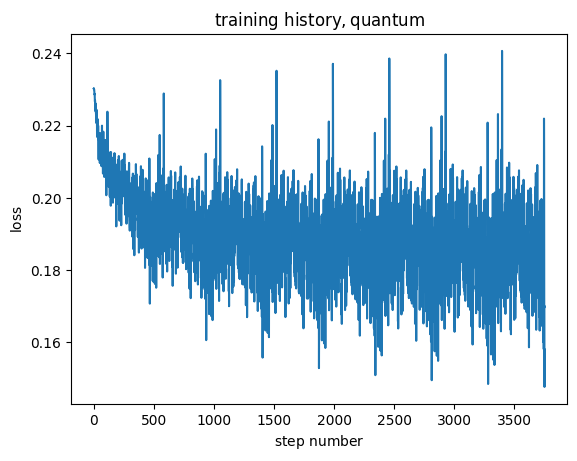

In [3]:
%time
start_time = time.time()
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
__=ax.plot((loss_history))
xlabel = ax.set_xlabel(r'${\rm step\ number}$')
ylabel = ax.set_ylabel(r'${\rm loss}$')
title = ax.set_title(r'${\rm training\ history, quantum}$')
epoch_time = time.time() - start_time
print(epoch_time)

In [4]:
train_accuracy

[Array(0.21098334, dtype=float32),
 Array(0.21011667, dtype=float32),
 Array(0.20991667, dtype=float32),
 Array(0.2096, dtype=float32),
 Array(0.2097, dtype=float32),
 Array(0.20955001, dtype=float32),
 Array(0.20935, dtype=float32),
 Array(0.20913334, dtype=float32)]

In [5]:
test_accuracy[-1]

Array(0.2121, dtype=float32)

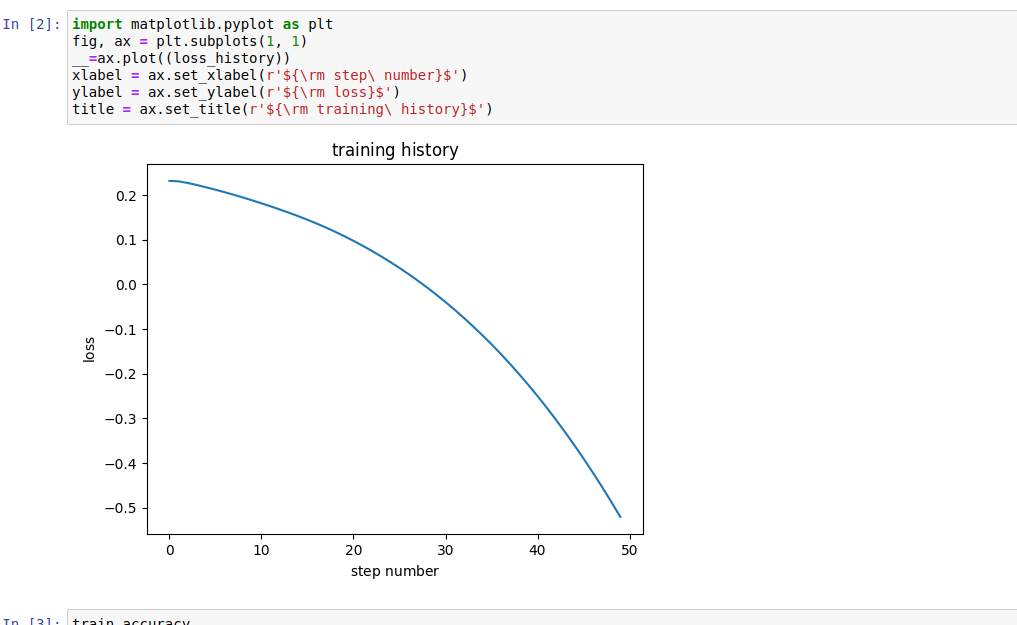
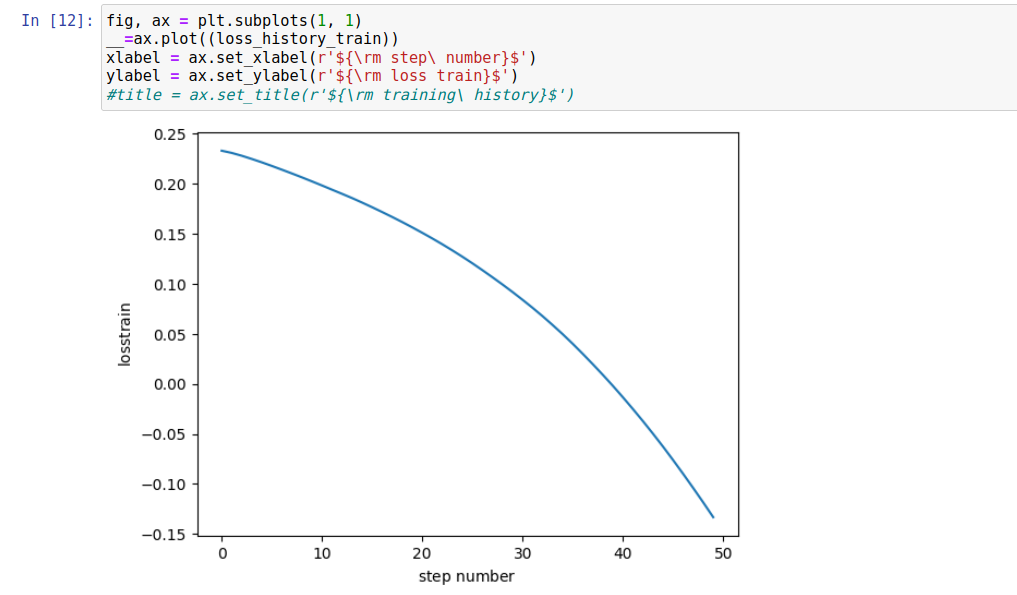
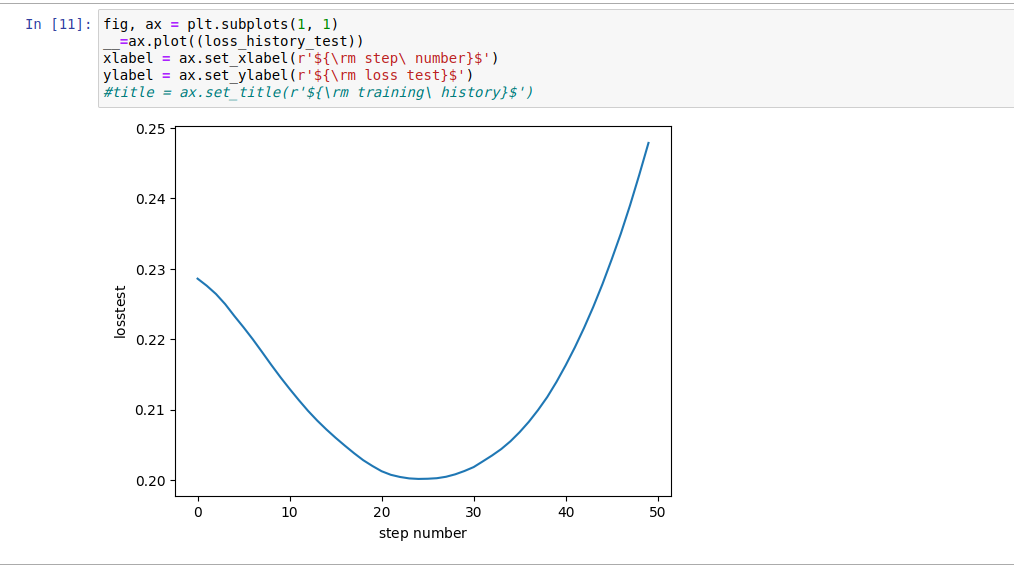
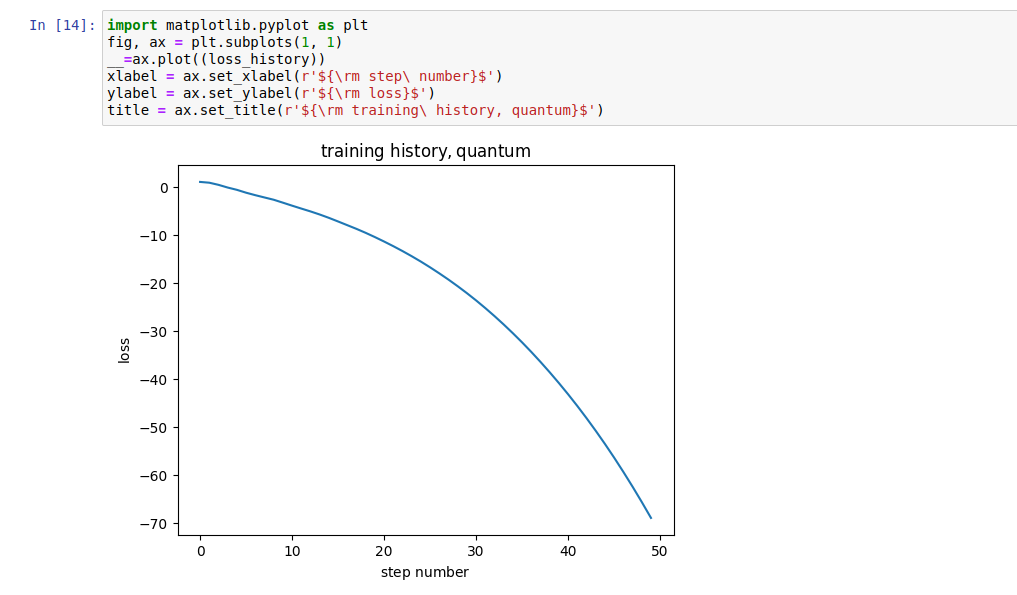
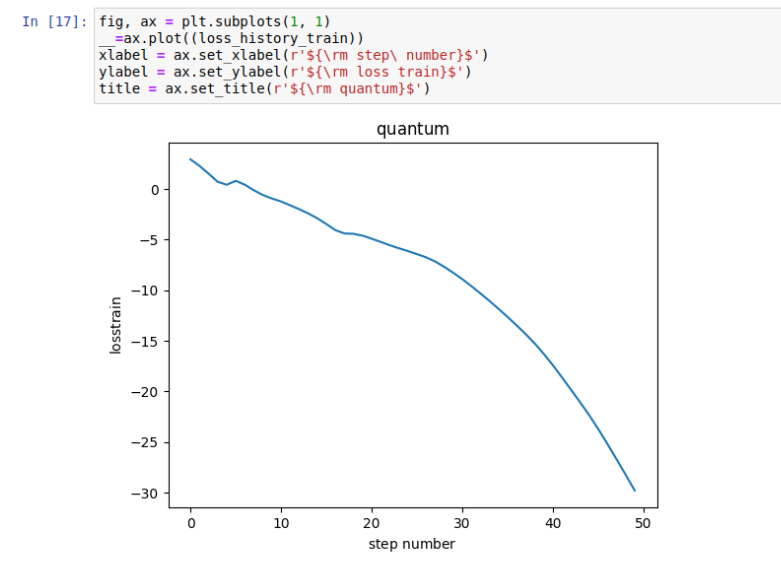
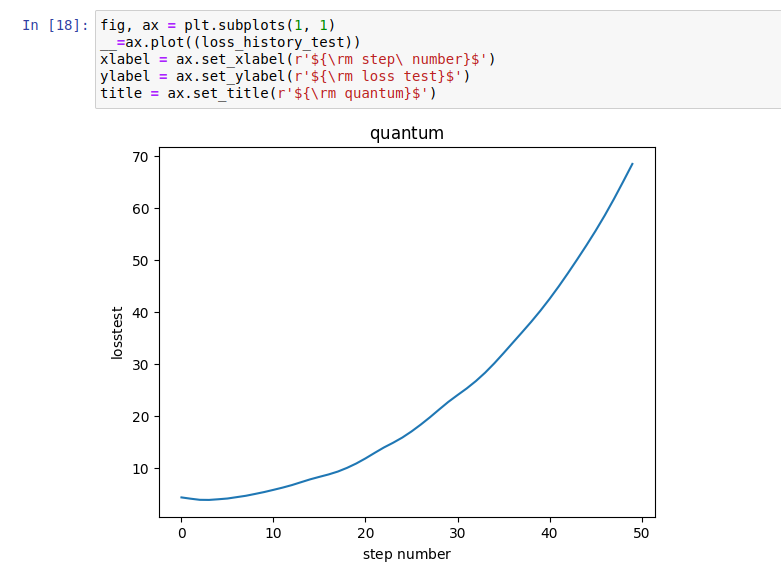

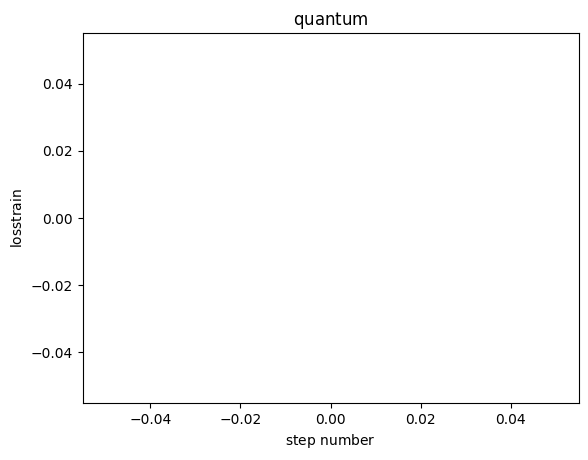

In [6]:
fig, ax = plt.subplots(1, 1)
__=ax.plot((loss_history_train))
xlabel = ax.set_xlabel(r'${\rm step\ number}$')
ylabel = ax.set_ylabel(r'${\rm loss train}$')
title = ax.set_title(r'${\rm quantum}$')

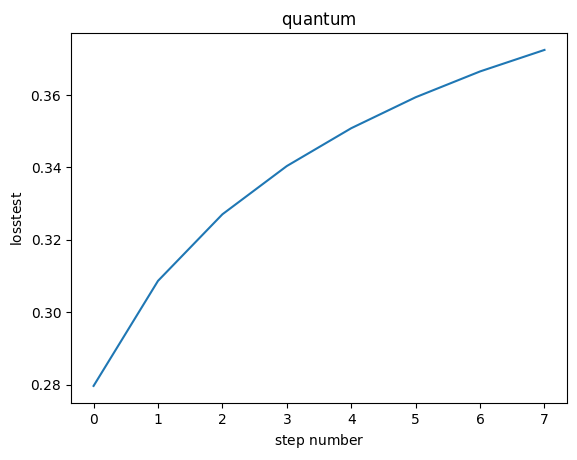

In [7]:
fig, ax = plt.subplots(1, 1)
__=ax.plot((loss_history_test))
xlabel = ax.set_xlabel(r'${\rm step\ number}$')
ylabel = ax.set_ylabel(r'${\rm loss test}$')
title = ax.set_title(r'${\rm quantum}$')

In [8]:
theta = jnp.asarray(90*np.random.random((3,6)), dtype = int)
theta1 = np.random.randint(90, size=(1, 6))
print(theta, theta1)

[[25  2 75 67 75 59]
 [10 10 65 82 66 87]
 [ 8 72 61 58  4 40]] [[66 14 86 39 35 27]]
